In [2150]:
#Bismillah,I will not  explain the below code, because i have commented before in my last assignment
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.api.types import is_string_dtype
import warnings
warnings.filterwarnings('ignore')

In [2254]:
df=pd.read_csv('weight-height.csv') # reading file

In [2152]:
df.head() #1st five values

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2153]:
df.nunique()  #Count number of distinct elements in specified axis

Gender       2
Height    8555
Weight    8555
dtype: int64

In [2154]:
df.shape # total datas and columns no 3

(8555, 3)

In [2155]:
df.isnull().sum() # searching null value

Gender    0
Height    0
Weight    0
dtype: int64

In [2156]:
df.info() # desriptive information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8555 entries, 0 to 8554
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  8555 non-null   object 
 1   Height  8555 non-null   float64
 2   Weight  8555 non-null   float64
dtypes: float64(2), object(1)
memory usage: 200.6+ KB


In [2157]:
df1=df.copy() # copying more than one data set for further use
df2=df.copy()
df3=df.copy()

In [2158]:
df.columns # shows columns

Index(['Gender', 'Height', 'Weight'], dtype='object')

In [2159]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2160]:
x=df.drop(['Weight'],axis=1) # drop 'Weight' then x=Gender and Height

In [2161]:
x.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


In [2162]:
y=df['Weight'] # after droping Weight , assign weight to the object y

In [2163]:
y.head()

0    241.893563
1    162.310473
2    212.740856
3    220.042470
4    206.349801
Name: Weight, dtype: float64

In [2164]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


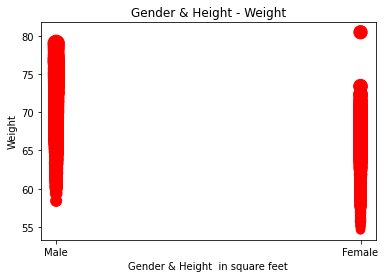

In [2165]:
plt.scatter(df.Gender, df.Height,df.Weight,color='red') # maf chai 3D plotting saara eikhane 2 ta x plot hobar noy
plt.xlabel('Gender & Height  in square feet')
plt.ylabel('Weight')
plt.title('Gender & Height - Weight')
plt.savefig('img1.png')

In [2166]:
mass=pd.get_dummies(x['Gender'],drop_first=True,prefix='Gender') #mass = will contain dummy value of Gender

In [2167]:
mass

,Gender_Male
0,1
1,1
2,1
3,1
4,1
...,...
8550,0
8551,0
8552,0
8553,0


In [2168]:
x=x.drop('Gender',axis=1) # droping Gender column

In [2169]:
x

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796
...,...
8550,60.483946
8551,63.423372
8552,65.584057
8553,67.429971


In [2170]:
x=pd.concat([x,mass],axis=1) # concatinating value of mass and X

In [2171]:
x.head(7772)

,Height,Gender_Male
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1
...,...,...
7767,66.529808,0
7768,62.180780,0
7769,61.648987,0
7770,64.819424,0


In [2172]:
from sklearn.model_selection import train_test_split  # importing train_test_split from skl.mdl_selection

In [2173]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 0) # 30% data is for test 70% data is for train respectively

In [2174]:
xtrain.shape #70% data of xtrain with 2 columns

(5988, 2)

In [2175]:
from sklearn.linear_model import LinearRegression #importing LinearRegression

In [2176]:
regressor = LinearRegression() # assigning into a variable
regressor.fit(xtrain, ytrain) #training data

LinearRegression()

In [2177]:
xtest.head()

,Height,Gender_Male
541,63.867921,1
3209,68.688931,1
7598,65.865244,0
5170,66.259558,0
2423,67.290776,1


In [2178]:
ytest.head()

541     174.473363
3209    178.507500
7598    155.248900
5170    138.839940
2423    154.718344
Name: Weight, dtype: float64

In [2179]:
# Predicting the Test set results
pred = regressor.predict(xtest)


In [2180]:
pred

array([156.20235428, 184.93442898, 148.42945323, ..., 159.2442037 ,
       166.96403181, 136.95529212])

In [2181]:
regressor.score(xtest,ytest) # testing acuracy

0.9025307579174772

In [2182]:
regressor.score(xtrain,ytrain) # training accuracy

0.8988118427483529

In [2183]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [2184]:
mean_squared_error(ytest,pred) # actual -predicted

102.3015415508887

In [2185]:
mean_absolute_error(ytest,pred) # actual -predicted

8.029100527825229

In [2186]:
linear_regression_accuracy=regressor.score(xtrain,ytrain)

In [2187]:
linear_regression_accuracy

0.8988118427483529

In [2188]:
linear_regression_mse=mean_squared_error(ytest,pred)

In [2189]:
linear_regression_mse

102.3015415508887

In [2190]:
linear_regression_prediction=pred

In [2191]:
linear_regression_prediction

array([156.20235428, 184.93442898, 148.42945323, ..., 159.2442037 ,
       166.96403181, 136.95529212])

# KNN regression with distance

In [2192]:
from sklearn.neighbors import KNeighborsRegressor # importing KNeighborsRegressor
from sklearn.metrics import r2_score              #importing r2_score

In [2193]:
neigh = KNeighborsRegressor(n_neighbors=99,weights='distance')  #assigning the method and giving the knn value=99,also mentioned distance

In [2194]:
neigh.fit(xtrain,ytrain) # training the model

KNeighborsRegressor(n_neighbors=99, weights='distance')

In [2195]:
pred2=neigh.predict(xtest) # predicting

In [2196]:
mean_squared_error(ytest,pred2) 

122.75294106637692

In [2197]:
mean_absolute_error(ytest,pred2)

8.736126434180182

In [2198]:
r2_score(ytest,pred2) # testing accuraccy

0.8830453974812424

In [2199]:
knnr_mse_dist=mean_squared_error(ytest,pred2)

In [2200]:
knnr_mse_dist

122.75294106637692

In [2201]:
knnr_accuracy_dist=r2_score(ytest,pred2)

In [2202]:
knnr_accuracy_dist

0.8830453974812424

In [2203]:
knnr_prediction_dist=pred2=neigh.predict(xtest)

In [2204]:
knnr_prediction_dist

array([157.25730215, 187.41433812, 153.98411366, ..., 159.75055285,
       175.485382  , 147.77954268])

# KNN regression uniform value without distance

In [2205]:
from sklearn.neighbors import KNeighborsRegressor # same as before

In [2206]:
neigh1 = KNeighborsRegressor(n_neighbors=99,weights='uniform')  # same type of activity  as before

In [2207]:
neigh1.fit(xtrain,ytrain) # training model

KNeighborsRegressor(n_neighbors=99)

In [2208]:
pred4=neigh1.predict(xtest) # predicting

In [2209]:
pred4

array([156.3272156 , 184.87479603, 148.75371688, ..., 160.15054383,
       167.87325368, 138.63309449])

In [2210]:
mean_squared_error(ytest,pred4) #MSE

107.68964831107884

In [2211]:
mean_absolute_error(ytest,pred4)

8.182584338867679

In [2212]:
r2_score(ytest,pred4) #Testing accuracy

0.8973971629176969

In [2213]:
knnr_mse_uni=mean_squared_error(ytest,pred4)

In [2214]:
knnr_mse_uni

107.68964831107884

In [2215]:
knnr_accuracy_uni=r2_score(ytest,pred4)

In [2216]:
knnr_accuracy_uni

0.8973971629176969

In [2217]:
knnr_prediction_uni=pred4

In [2218]:
knnr_prediction_uni

array([156.3272156 , 184.87479603, 148.75371688, ..., 160.15054383,
       167.87325368, 138.63309449])

# KNN Classifier

In [2219]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2220]:
df1.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [2221]:
#doing one hot encoding at a glance
for col in df1.columns:
    if is_string_dtype(df1[col])==True:
        dummy=pd.get_dummies(df1[col],drop_first=True,prefix=col)
        df1.drop(df1[[col]],axis=1,inplace=True)
        df1=pd.concat([df1,dummy],axis=1)

In [2222]:
df1.head()

,Height,Weight,Gender_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [2223]:
x=df1.drop(['Gender_Male'],axis=1) #droping Gender_Male,x=Height,Weight

In [2224]:
x

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
...,...,...
8550,60.483946,110.565497
8551,63.423372,129.921671
8552,65.584057,155.942671
8553,67.429971,151.678405


In [2225]:
y=df1['Gender_Male'] # y= Gender_Male

In [2226]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender_Male, dtype: uint8

In [2227]:
df1.head()

,Height,Weight,Gender_Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [2228]:
x.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [2229]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Gender_Male, dtype: uint8

In [2230]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.30, random_state = 1) # 30% data will be for testing and 70% will for training respectively,not explaing coz, we have done same thing on above shell

In [2231]:
xtrain.head()

,Height,Weight
1277,72.385301,189.165592
5361,60.960147,124.876796
5728,69.119292,168.864403
4276,68.271050,172.941248
3112,64.991405,144.551044


In [2232]:
xtrain.shape

(5988, 2)

In [2233]:
ytrain.shape

(5988,)

# KNN Classification with weights=distance


In [2234]:
from sklearn.neighbors import KNeighborsClassifier #please follow knn reg weights=uniform

In [2235]:
knc = KNeighborsClassifier(n_neighbors=99,weights='distance') #please follow knn reg weights=uniform

In [2236]:
knc.fit(xtrain,ytrain)   #training model

KNeighborsClassifier(n_neighbors=99, weights='distance')

In [2237]:
pred3=knc.predict(xtest) #predicting

In [2238]:
pred3

array([1, 1, 1, ..., 0, 1, 1], dtype=uint8)

In [2239]:
mean_squared_error(ytest,pred3)

0.07752239968835216

In [2240]:
mean_absolute_error(ytest,pred3)

9.675496688741722

In [2241]:
r2_score(ytest,pred3) # testing accuracy

0.6797606509691818

# KNN Classification with weights=uniform

In [2242]:
knc1 = KNeighborsClassifier(n_neighbors=99,weights='uniform') #please follow knn reg weights=uniform

In [2243]:
knc1.fit(xtrain,ytrain)  #please follow knn reg weights=uniform

KNeighborsClassifier(n_neighbors=99)

In [2244]:
pred5=knc1.predict(xtest) #please follow knn reg weights=uniform

In [2245]:
mean_squared_error(ytest,pred5) #please follow knn reg weights=uniform

0.08102843786521231

In [2246]:
mean_absolute_error(ytest,pred5)

10.173743669653291

In [2247]:
r2_score(ytest,pred5)

0.6652774643295971

# Linear Regression

In [2248]:
# Testing accuracy = 0.9025307579174772                            1st PLACE(for model selection)
# MSE = 102.3015415508887

# KNN_Regression_Distance

In [2249]:
#Testing accuracy= 0.8830453974812424                             3rd  PLACE(for model selection)
#MSE=122.75294106637692

# KNN_Regression_Uniform

In [2250]:
#Testing accuracy=0.8973971629176969                               2nd PLACE(for model selection)
#MSE=107.68964831107884


# KNN_Clasifier_Regression_Distance

In [2251]:
#Testing accuracy=0.6797606509691818                                4th PLACE(for model selection)
#MSE=0.07752239968835216


# KNN_Classifier_Regression_Uniform

In [2252]:
#Testing accuracy=0.6652774643295971                                5th PLACE(for model selection)
#MSE=0.08102843786521231


In [2253]:
print("Alhamdulillah")

Alhamdulillah
